# Tensorflow Playground

In [1]:
import tensorflow as tf
import numpy as np
# %matplotlib inline

# Useful thing(s):
# shift + tab to see the docs of the code

## Example 1: Linear model training example

In [2]:
# Linear model learning example

# x, y data
# weights, biases

# loss
# optimizer
# train(minimize)

# session
# run


# Data processing
x_data = np.random.rand(100).astype(np.float32)
print(x_data.shape)

y_data = x_data * 0.1 + 0.3
print(y_data.shape)


# Tensorflow construction
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

y = Weights * x_data + b

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

(100,)
(100,)


In [3]:
# Using session to activate the init by using run init
session1 = tf.Session() 
session1.run(init)  

for step in range(201):
    session1.run(train)
    
    if step % 20 == 0:
        print(step, session1.run(Weights), session1.run(b))



0 [-0.46540922] [ 0.83650702]
20 [-0.06045692] [ 0.38589603]
40 [ 0.06114936] [ 0.32079759]
60 [ 0.09059331] [ 0.30503562]
80 [ 0.0977224] [ 0.30121925]
100 [ 0.09944853] [ 0.30029523]
120 [ 0.09986647] [ 0.30007148]
140 [ 0.09996768] [ 0.30001733]
160 [ 0.09999218] [ 0.30000421]
180 [ 0.09999812] [ 0.30000103]
200 [ 0.09999953] [ 0.30000025]


## Example 2: Use tensorflow session to run the structure

In [4]:
matrix1 = tf.constant([[3, 3]])
matrix2 = tf.constant([[2],
                       [2]])

product = tf.matmul(matrix1, matrix2)  # This is similar to np.dot(m1, m2)

# method 1
# session2 = tf.Session()
# mul_result = session2.run(product)

# print(mul_result)
# session2.close()


# method 2
with tf.Session() as session2_2:
    mul_result2 = session2_2.run(product)
    print(mul_result2)

[[12]]


## Example 3: Variable

In [5]:
state = tf.Variable(0, name = 'counter')
# print(state.name)
one = tf.constant(1)

# new_value = tf.add(state, one)
new_value = state + 1

update = tf.assign(state, new_value)
init = tf.global_variables_initializer()

In [6]:
with tf.Session() as session3:
    session3.run(init)
    
    for _ in range(3):
        session3.run(update)
        print(session3.run(state))

1
2
3


## Example 4: Placeholder

In [7]:
# The difference between variable and placeholder is that variable sets the value when declaring it, 
# placeholder don't need to pass the value until calling session.run, but need to specify type of the placeholder. 

# Placeholder normally deals with float32

In [8]:
input4_1 = tf.placeholder(tf.float32)
input4_2 = tf.placeholder(tf.float32)

output = tf.multiply(input4_1, input4_2)

with tf.Session() as session4:
    print(session4.run(output, feed_dict = {input4_1: [7.], input4_2: [2.]}))

[ 14.]


## Example 5: Neural Network add_layer()

In [9]:
import matplotlib.pyplot as plt
import time

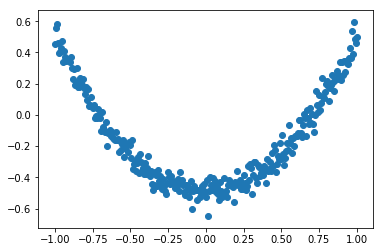

3.54485
0.0183045
0.0123533
0.00848859
0.00618058
0.00492758
0.00427529
0.00394972
0.00377614
0.00365091
0.00355309
0.00347887
0.00341527
0.00335699
0.00331492
0.00327502
0.00323916
0.00320869
0.00317367
0.00313435


In [15]:
# Activation Functions:
# Linear Function
# Step Function
# Ramp Function
# Sigmoid
# tanh


def add_layer(inputs, in_size, out_size, activation_function = None):
    Weights = tf.Variable(tf.random_normal((in_size, out_size)))
    biases = tf.Variable(tf.zeros((1, out_size))+0.1)
    
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    
    if not activation_function:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    
    return outputs
            
    
x_data = np.linspace(-1, 1, 300)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

# Input layer 1
# Hidden layer 10
# Output layer 1

l1 = add_layer(xs, 1, 10, activation_function = tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function = None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                     reduction_indices=[1]))


optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
session5 = tf.Session()

session5.run(init)


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x_data, y_data)
# Continuously show
plt.ion()
plt.show()


for i in range(1000):
    session5.run(train, feed_dict = {xs: x_data, ys: y_data})
    
    if i % 50 == 0:
        print(session5.run(loss, feed_dict = {xs: x_data, ys: y_data}))



#         plotting

#         try:
#             ax.lines.remove(lines[0])
#         except Exception:
#             pass
        
        prediction_value = session5.run(prediction, feed_dict={xs: x_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw = 5)
#         ax.lines.remove(lines[0])
#         plt.pause(0.1)

session5.close()

